# Image Recognition with CNN
Kevin Schoelzel Capstone Project


## Introduction 

For my capstone project I used the cDiscount product catalog from kaggle to build an image recognition model using Keras Convoluted Neural Networks libraries. 

The data for this project was massive (58GB) and consisted of over 7 million distinct pictures, which could be classified into 5720 distinct categories. This data was too large to be classified on a non-GPU computer in an efficient manner. 

As such, I created two smaller datasets, containing five categories each. I refer to these two sets as samples throughout my notebooks. I then built two CNN models to gain a better understanding of how these algorithms work. 


The first sample was comprised of objects that were all similar to each other; I refer to the files dealing with this first sample as Wine. 

The five categories for this sample were: 

- Whiskey  
- Red Wine
- White Wine
- Rose
- Champagne

The second set of items I selected were all different. I wanted to see if there was a noticeable difference in how the model performed when there were visually more distinct differences to train on. I refer to this second set as Mixed Bag or MB throughout my notebooks. 

The five categories for this sample were

- Photography Books 
- Auto Fuses
- Hinges
- Lotion 
- Bed Headboards

Both test sets were 7916 items (roughly 0.1% of the total database). I picked these items because they had almost the same number of items per category. In keeping these characteristics of my data "constant" I hoped to isolate the variables I was testing. 

## Notebooks, Data Cleaning, and Modeling 


To jump from the EDA to different sections of my capstone, you can use the links below: 

[II. Wine Data Pipeline an Generator  ](II. Wine - Data Pipeline and Generator - Final.ipynb).

[II. MB Data Pipeline an Generator  ](II. MB Data Pipeline and Generator - Final.ipynb).

During the Data Generation, the items were converted to categorical numbers before they were loaded into the final model pipeline. Because of the requirements of Neural Nets to have distinct shapes of the input data it was creating an error when I tried to convert them back to create the confusion matrix. Luckily, this could be remedied by using a separate pandas dataframe that had the category and product ids (but not the picture data). It was easier to get the information I needed, which is what the fixed Y-vales shows. 

I have commented out the to-categorical lines in the main pipelines, but these Fixed Y-Values files should still be run, as its the arrays saved out of them that are loaded into my final models. 

[III. Wine Fixed Y-Values ](Wine Fixed Y-Values - Final.ipynb).

[III. MB Fixed Y-Values ](III. MB Fixed Y-Values - Final.ipynb).


The model notebooks:


[IV. Wine Model and Analysis ](IV. Wine Model and Analysis - Final.ipynb).

[IV. MB Model and Analysis ](IV. MB Model and Analysis - Final.ipynb).


In addition, here is the link to my notebook from part two, which illustrates working with the BSON file type and extracting the images. The insights from this notebook were what I used in the data generators and pipelines. 

[Exploring Image Files and BSON](Exploring Image Files and BSON.ipynb).



In [18]:
# Imports 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

In [11]:
# Import Data
df_names = pd.read_csv("category_names.csv")


# EDA and Process


In [6]:
df= pd.read_csv("category_df.csv")
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.head()

,_id,category_id
0,0,1000010653
1,1,1000010653
2,2,1000004079
3,3,1000004141
4,4,1000015539


In [15]:
# Over 7 million unique items in the data set
len(df)

7069896

In [16]:
# 5270 categories
len(df['category_id'].unique())

5270

In [19]:
# Breaking down to see how the categories are distributed
df['category_id'].value_counts().head()

1000018296    79640
1000011423    71116
1000011427    69784
1000014202    65642
1000015309    65435
Name: category_id, dtype: int64

(array([ 490.,  306.,  345., ...,    0.,    0.,    1.]),
 array([  1.20000000e+01,   2.71096774e+01,   4.22193548e+01, ...,
          7.96097806e+04,   7.96248903e+04,   7.96400000e+04]),
 <a list of 5270 Patch objects>)

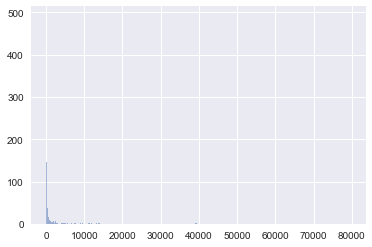

In [66]:
items= df['category_id'].value_counts()
plt.hist(items, bins=len(items), alpha=0.5)

In [22]:
# 49 classifications for category_1
len(df_names['category_level1'].unique())

49

In [23]:
len(df_names['category_level2'].unique())

483

In [24]:
len(df_names['category_level3'].unique())

5261

In [25]:
len(df_names['category_id'].unique())

5270

In [14]:
# Can use the category_names datframe to see different classificatiosn and pull up names

df_names[df_names['category_id']== 1000010110]

,category_id,category_level1,category_level2,category_level3
1046,1000010110,BIJOUX - LUNETTES - MONTRES,BIJOUX,BRACELET - GOURMETTE


In [27]:
# First Test Set - Whiskey, Red Wine, Champagne, White Wine, and Rose)
first_targets = [1000003437, 1000003400, 1000003407, 1000003402, 1000003404]


In [47]:
def see_cats_table(id_num, data_frame):
    return data_frame[data_frame['category_id']== id_num]

In [49]:
# Whiskey 
see_cats_table(1000003437, df_names)

,category_id,category_level1,category_level2,category_level3
5246,1000003437,VIN - ALCOOL - LIQUIDES,ALCOOL,WHISKY-BOURBON-SCOTCH


In [36]:
# Get a sense of where the items are throughout the dataset and the number of images
df[df['category_id']==1000003437].head()

,_id,category_id
9381,13069,1000003437
17594,24308,1000003437
31387,42764,1000003437
63771,104618,1000003437
66323,110043,1000003437


In [37]:
# 847 images in this category 
num_whisk= len(df[df['category_id']==1000003437])

In [50]:
# Red Wine
see_cats_table(1000003400, df_names)

,category_id,category_level1,category_level2,category_level3
5269,1000003400,VIN - ALCOOL - LIQUIDES,VIN,VIN ROUGE


In [51]:
# Get a sense of where the items are throughout the dataset and the number of images
df[df['category_id']==1000003400].head()

,_id,category_id
3200,4565,1000003400
13442,18708,1000003400
17232,23822,1000003400
18371,25363,1000003400
21314,29365,1000003400


In [41]:
# 4398 images for the red wine
num_red= len(df[df['category_id']==1000003400])

In [53]:
# White Wine 
see_cats_table(1000003402, df_names)

,category_id,category_level1,category_level2,category_level3
5267,1000003402,VIN - ALCOOL - LIQUIDES,VIN,VIN BLANC


In [54]:
df[df['category_id']==1000003402].head()

,_id,category_id
27060,37050,1000003402
41359,56189,1000003402
49015,72709,1000003402
51170,77327,1000003402
62543,101977,1000003402


In [56]:
# 1346 images of white wine 
num_white= len(df[df['category_id']==1000003402])

In [57]:
# Rose 
see_cats_table(1000003404, df_names)

,category_id,category_level1,category_level2,category_level3
5268,1000003404,VIN - ALCOOL - LIQUIDES,VIN,VIN ROSE


In [58]:
df[df['category_id']==1000003404].head()

,_id,category_id
21794,30030,1000003404
41869,57298,1000003404
61008,98630,1000003404
68751,115329,1000003404
83513,147457,1000003404


In [62]:
# 405 images of Rose 
num_rose = len(df[df['category_id']==1000003404])

In [67]:
see_cats_table(1000003407, df_names)

,category_id,category_level1,category_level2,category_level3
5254,1000003407,VIN - ALCOOL - LIQUIDES,CHAMPAGNE - PETILLANT - MOUSSEUX,CHAMPAGNE


In [69]:
df[df['category_id']==1000003407].head()

,_id,category_id
16629,23035,1000003407
18951,26108,1000003407
32429,44177,1000003407
36864,50095,1000003407
49144,72957,1000003407


In [70]:
# 920 photos of Champagne bottles
num_champ= len(df[df['category_id']==1000003407])

In [80]:
total_set1_items = num_whisk + num_red + num_white + num_rose + num_champ
total_set1_items

7916

(array([ 3.,  1.,  0.,  0.,  1.]),
 array([  405. ,  1203.6,  2002.2,  2800.8,  3599.4,  4398. ]),
 <a list of 5 Patch objects>)

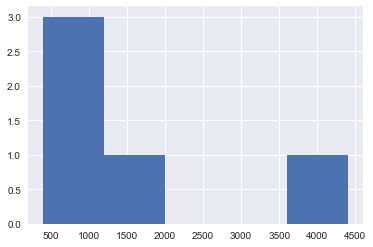

In [74]:
plt.hist([num_whisk, num_red, num_white, num_rose, num_champ], bins=5)

(array([ 3.,  1.,  0.,  0.,  1.]),
 array([ 0.0511622 ,  0.15204649,  0.25293077,  0.35381506,  0.45469934,
         0.55558363]),
 <a list of 5 Patch objects>)

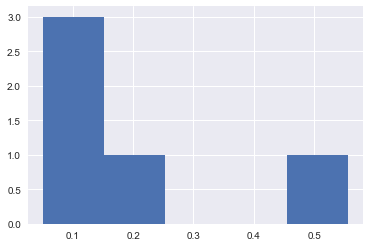

In [76]:
plt.hist([num_whisk/total_set1_items, num_red/total_set1_items, num_white/total_set1_items, num_rose/total_set1_items, num_champ/total_set1_items], bins=5)

In [83]:
lst_nums = [num_whisk, num_red, num_white, num_rose, num_champ]
for num in lst_nums:
    print("percent " + str(num) + " = " + str(num/total_set1_items))

percent 847 = 0.10699848408287013
percent 4398 = 0.5555836280949975
percent 1346 = 0.17003537139969682
percent 405 = 0.0511622031328954
percent 920 = 0.11622031328954018


In [98]:
# Second Set of Items 
# Important that there are 5 categories, with roughly the same distribution
# charactistics of the first set 

# photography books, auto-fuses, headboards, hinges, lotion
second_targets = [1000014042, 1000005888, 1000015754, 1000002844, 1000003988]



In [91]:
df_temps = df['category_id'].value_counts()

In [147]:
# used filtering to find groups of similar size but different categories
#df_temps[df_temps.values<406]


In [112]:
see_cats_table(1000014042, df_names)

,category_id,category_level1,category_level2,category_level3
3251,1000014042,LIBRAIRIE,ARTS - CINEMA - MUSIQUE,PHOTOGRAPHIE


In [105]:
# 4401 Photography Books

num_photo_books = len(df[df['category_id']== 1000014042])

In [111]:
see_cats_table(1000005888, df_names)


,category_id,category_level1,category_level2,category_level3
754,1000005888,AUTO - MOTO,PIECES,FUSIBLES


In [131]:
# 1348  Auto-fuses
num_fuses= len(df[df['category_id']== 1000002478])

In [116]:
see_cats_table(1000015754, df_names)

,category_id,category_level1,category_level2,category_level3
3404,1000015754,LITERIE,ACCESSOIRES LITERIE,TETE DE LIT


In [132]:
# 920 headboards for Beds
num_headboards=len(df[df['category_id']== 1000015754])

In [125]:
see_cats_table(1000002844 , df_names)

,category_id,category_level1,category_level2,category_level3
1407,1000002844,BRICOLAGE - OUTILLAGE - QUINCAILLERIE,QUINCAILLERIE,CHARNIERE - FICHE - PAUMELLE D'AMEUBLEMENT - P...


In [133]:
# Number hinges 845
num_hinges=len(df[df['category_id']== 1000002844])

In [140]:
see_cats_table(1000003988, df_names)

,category_id,category_level1,category_level2,category_level3
2322,1000003988,HYGIENE - BEAUTE - PARFUM,CAPILLAIRE,PRODUIT DE DEFRISAGE - PRODUIT DE LISSAGE


In [141]:
# Lotion
num_lotion= len(df[df['category_id']== 1000003988])

In [144]:
# Same size as my first test group

total_set2_items = num_photo_books + num_fuses + num_headboards + num_hinges + num_lotion
total_set2_items

7916

(array([ 3.,  1.,  0.,  0.,  1.]),
 array([  402. ,  1201.8,  2001.6,  2801.4,  3601.2,  4401. ]),
 <a list of 5 Patch objects>)

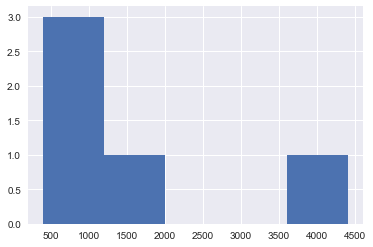

In [145]:
plt.hist([num_photo_books, num_fuses, num_headboards, num_hinges, num_lotion], bins=5)

In [146]:
lst_nums = [num_photo_books, num_fuses, num_headboards, num_hinges, num_lotion]
for num in lst_nums:
    print("percent " + str(num) + " = " + str(num/total_set1_items))

percent 4401 = 0.5559626073774634
percent 1348 = 0.17028802425467407
percent 920 = 0.11622031328954018
percent 845 = 0.10674583122789287
percent 402 = 0.05078322385042951
